# $\underline{\textbf{EXAMEN 1 - GUSTAVO MEDINA}}$

$\text{Este es el Notebook del codigo de la actividad del examen 1 de Fisica Computacional}$

# $\underline{\text{PARTE 1:}}$

In [167]:
#Importando las bibliotecas a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf 

In [168]:



#==========CREANDO UN DF DEL ARCHIVO DE DATOS Y UN DF PROVICIONAL DE TRABAJO====================
# Creamos un DataFrame compra a partir del archivo de texto de los datos diarios de la estacion en nuestro repositorio:

url = "https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Eval1/data/co2_spo_DailyData.txt"
#La URL del archivo de datos que esta guardado en el repositorio de internet de ESRL NOAA
encabezados=['site_code', 'year', 'month', 'day', 'hour', 'minute', 'second', 'time_decimal', 'value', 'value_std_dev', 'nvalue', 'latitude', 'longitude', 'altitude', 'elevation', 'intake_height', 'qcflag'] #Encabezados de las columnas, de acuerdo al archivo que se leera


df_CO2 = pd.read_csv(url, names=encabezados, encoding='cp1251', sep='\s+', header=None, skiprows=151, skipfooter=0, engine='python')
#print(df_CO2.head())
#print(df_CO2.info())
#print(df_CO2.shape) (16436,17)

#Todo parece estar bien, ahora lo que se hara es juntar 'year', 'month' y 'day' en una nueva columna aparte:

#Hacemos una copia de trabajo:
df_CO3=df_CO2.copy() #Jaja, CO3

df_CO3["Date"] = df_CO3['day'].astype(str) + '/' + df_CO3["month"].astype(str) + '/' + df_CO3["year"].astype(str)

#print(df_CO3.head())
#print(df_CO3.tail())

#Cambiando Date a formato de fecha:
df_CO3['Date']=pd.to_datetime(df_CO3['Date'], dayfirst=True).copy()
#df_CO3['value'].astype(float)
df_CO3['value']=pd.to_numeric(df_CO3['value'], errors='coerce')
df_CO3.info()


#Poniendo Date como el indice
df_CO3=df_CO3.set_index('Date')

df_CO4=df_CO3.copy()

#print(df_CO4)

#Ahora eliminamos los nulos (valores que son -999.99):
df_CO4=df_CO4.replace(to_replace=-999.99, value=' ', regex=True) 
df_CO4['value']=pd.to_numeric(df_CO4['value'], errors='coerce')
df_CO5=df_CO4.ffill().bfill()

#Ahora seleccionamos solo las columnas que nos interesan:

ts_test=df_CO5['value'].copy()

ts_test









<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   site_code      16436 non-null  object        
 1   year           16436 non-null  int64         
 2   month          16436 non-null  int64         
 3   day            16436 non-null  int64         
 4   hour           16436 non-null  int64         
 5   minute         16436 non-null  int64         
 6   second         16436 non-null  int64         
 7   time_decimal   16436 non-null  float64       
 8   value          16436 non-null  float64       
 9   value_std_dev  16436 non-null  float64       
 10  nvalue         16436 non-null  int64         
 11  latitude       16436 non-null  float64       
 12  longitude      16436 non-null  float64       
 13  altitude       16436 non-null  float64       
 14  elevation      16436 non-null  float64       
 15  intake_height  1643

Date
1975-01-01    328.23
1975-01-02    328.23
1975-01-03    328.23
1975-01-04    328.23
1975-01-05    328.23
               ...  
2019-12-27    409.06
2019-12-28    409.00
2019-12-29    408.70
2019-12-30    408.41
2019-12-31    408.57
Name: value, Length: 16436, dtype: float64

# $\underline{\text{PARTE 2:}}$

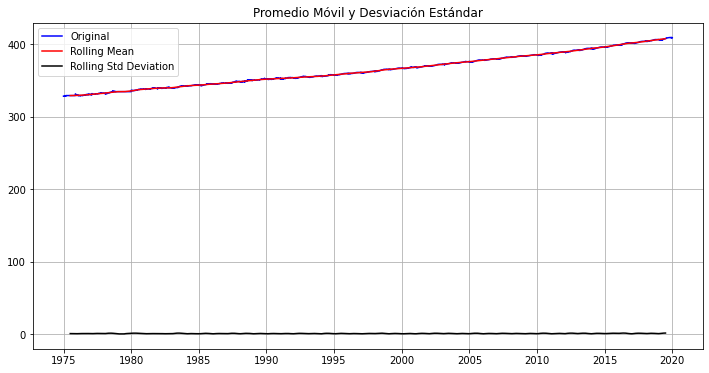

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                     1.221304
p-value                            0.996130
#Lags Used                        42.000000
Number of Observations Used    16393.000000
Critical Value (1%)               -3.430749
Critical Value (5%)               -2.861716
Critical Value (10%)              -2.566864
dtype: float64


In [169]:
#Ahora vamos a hacer la funcion para probar la estacionaridad de la serie:

def test_stationarity(df_ts): 
     #Determinar la Estadística de promedios móviles
     rolmean = df_ts.rolling(window=365, center=True).mean()
     rolstd = df_ts.rolling(window=365, center=True).std()

     # Define el tamaño de la figura
     plt.rcParams["figure.figsize"] = (12,6)

     #Graficar la Estadística de promedios móviles
     plt.plot(df_ts, color='blue',label='Original')
     plt.plot(rolmean, color='red', label='Rolling Mean')
     plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
     plt.legend(loc='best')
     plt.title('Promedio Móvil y Desviación Estándar')
     plt.grid()
     plt.show()

     #Realiza la Prueba Aumentada de Dickey-Fuller:
     print('Resultados de la Prueba de Dickey-Fuller:')
     dftest = adfuller(df_ts, autolag='AIC')
     dfoutput = pd.Series(dftest[0:4],
          index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
     for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value

     print(dfoutput)

test_stationarity(ts_test)

# $\text{Como podemos ver, la p es mayor a 0.05, por lo que trataremos de hacerlo menor, cambiando la escala a logaritmica:}$

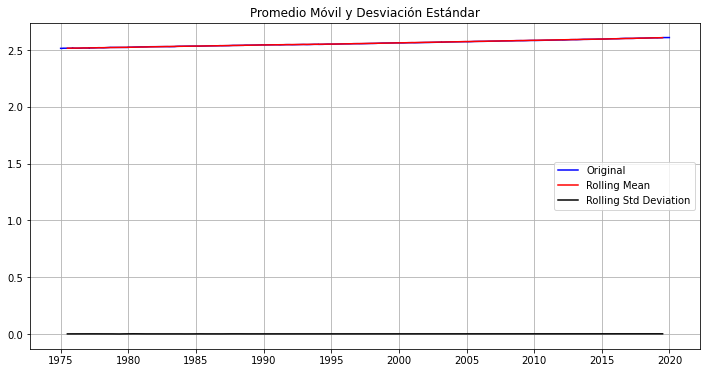

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                     0.667707
p-value                            0.989171
#Lags Used                        42.000000
Number of Observations Used    16393.000000
Critical Value (1%)               -3.430749
Critical Value (5%)               -2.861716
Critical Value (10%)              -2.566864
dtype: float64
Date
1975-01-01    0.000013
1975-01-02    0.000013
1975-01-03    0.000013
1975-01-04    0.000013
1975-01-05    0.000013
                ...   
2019-12-27    0.000128
2019-12-28    0.000128
2019-12-29    0.000128
2019-12-30    0.000128
2019-12-31    0.000128
Name: value, Length: 16436, dtype: float64


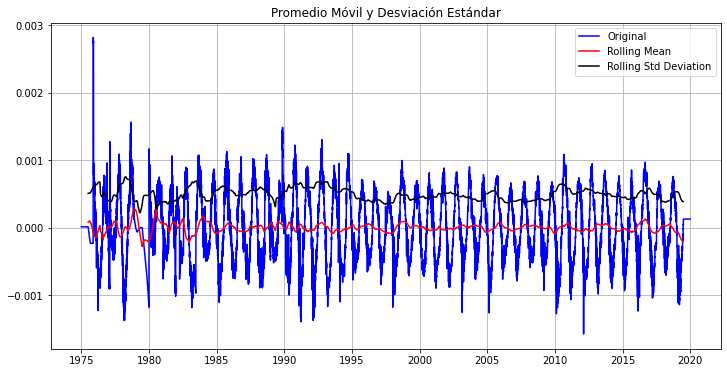

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.143969e+01
p-value                        6.222451e-21
#Lags Used                     4.300000e+01
Number of Observations Used    1.639200e+04
Critical Value (1%)           -3.430749e+00
Critical Value (5%)           -2.861716e+00
Critical Value (10%)          -2.566864e+00
dtype: float64


In [170]:
ts_testlog=np.log10(ts_test)

test_stationarity(ts_testlog)

#Intentaremo restandole el promedio movible de 365 dias:
ts_testlog_av365=ts_testlog.rolling(365, center=True).mean()
ts_testlog_diff=ts_testlog-ts_testlog_av365
ts_testlog_diff=ts_testlog_diff.ffill().bfill()
print(ts_testlog_diff)

test_stationarity(ts_testlog_diff)

# $\text{Para seguir intentando reducir la variacion del promedi y la DE, vamos a hacer una descomposicion de la serie:}$

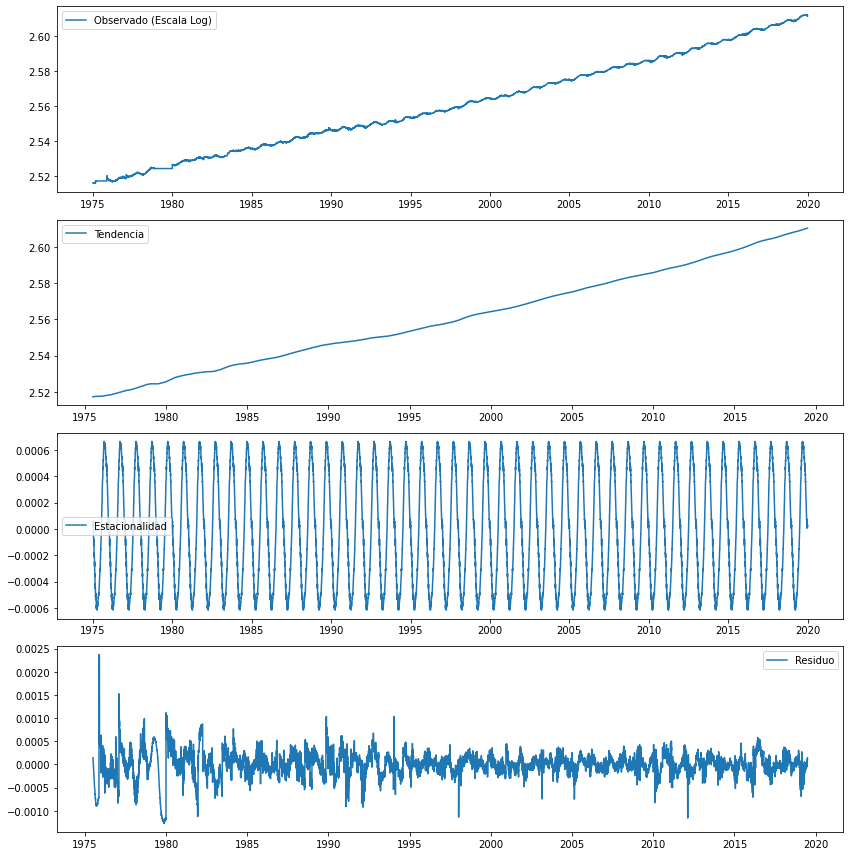


---------------------------


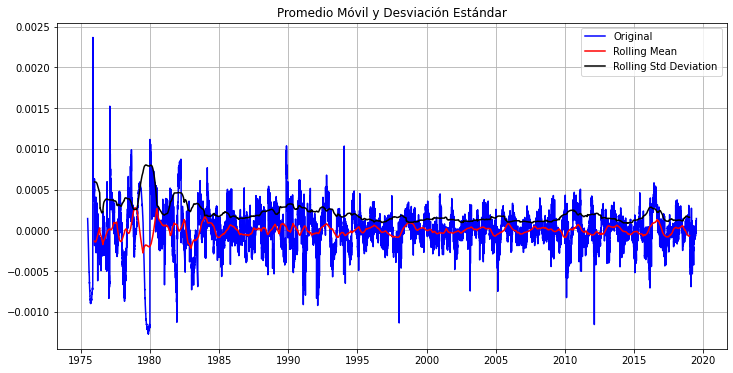

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.145540e+01
p-value                        5.723039e-21
#Lags Used                     2.800000e+01
Number of Observations Used    1.604300e+04
Critical Value (1%)           -3.430758e+00
Critical Value (5%)           -2.861720e+00
Critical Value (10%)          -2.566866e+00
dtype: float64


In [171]:
# Método de descomposición usando la biblioteca statsmodels.tsa

decompositionTS_testlog = sm.tsa.seasonal_decompose(ts_testlog.interpolate(), model='additive', freq=365)

# La función regresa 3 componentes: tendencia, estacionalidad y un residuo

trend = decompositionTS_testlog.trend
seasonal = decompositionTS_testlog.seasonal
residue = decompositionTS_testlog.resid

# Graficamos las componentes
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(411)
plt.plot(ts_testlog, label='Observado (Escala Log)')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residue, label='Residuo')
plt.legend(loc='best')

# Colocar gráficas lo más cercanas posibles
plt.tight_layout();
plt.show()
print('\n---------------------------')

#Ahora vamos a hacer un test de la grafica de residuo, eliminando Tendencia y Estacinoalidad:
ts_test_logresid=residue
ts_test_logresid.dropna(inplace=True)
test_stationarity(ts_test_logresid)

$\text{Podemos observar que la p sigue siendo menor a 0.05, y el promedio y la desviacion estandar se regularizan bastantemente, sin embargo}$

$\text{podemos ver que hay unos datos bastante anomalos al principio, que honestamente no sabria como interpretar.}$

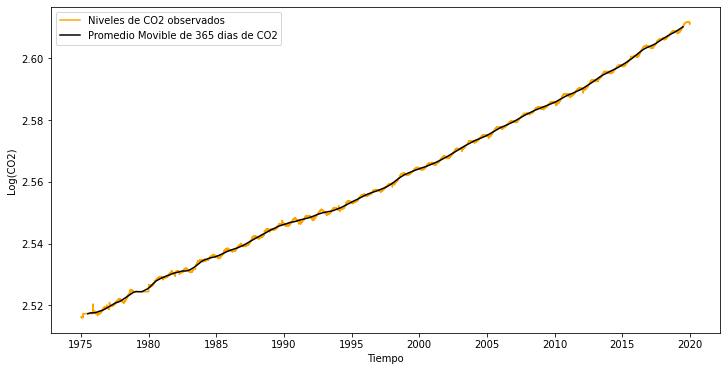

In [172]:
#Ahora vamos a hacer un promedio movil de 365 dias de ts_test_log y lo vamos a contrastar con ts_test_log:

plt.plot(ts_testlog,color='orange',label='Niveles de CO2 observados')
plt.plot(ts_testlog_av365,color='black', label='Promedio Movible de 365 dias de CO2')

plt.xlabel('Tiempo')
plt.ylabel('Log(CO2)')
plt.legend()
plt.show()

# $\text{PROFESOR, habia estado haciendo todo en orden hasta que vi que nos pide la diferencia del promedio movible y el log original. }$

# $\text{Esto ya lo hice en una celda anterior, la que empieza con {143}}$

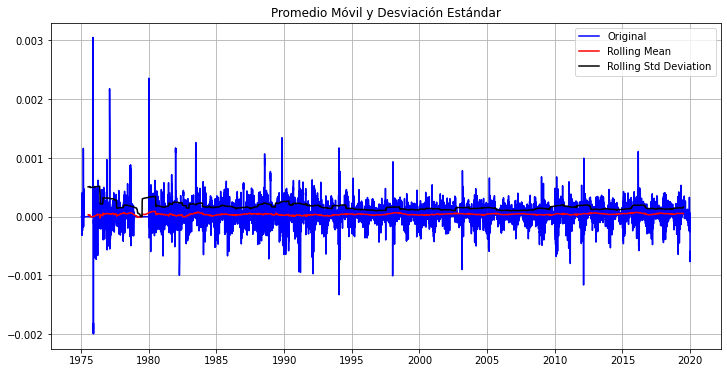

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.370332e+01
p-value                        1.277521e-25
#Lags Used                     4.300000e+01
Number of Observations Used    1.638500e+04
Critical Value (1%)           -3.430749e+00
Critical Value (5%)           -2.861716e+00
Critical Value (10%)          -2.566864e+00
dtype: float64


In [173]:
#Ahora haremos uso de la funcion .shift() para hacer una serie de tiempo que esta movida por 7 dias

ts_testlogshft=ts_testlog.shift(periods=7)

#Haciendo la diferencia entre el df normal y el df con shift de 7 dias
ts_test_logshft_diff=ts_testlog-ts_testlogshft
#print(ts_testlogshft.head(10))


ts_test_logshft_diff.dropna(inplace=True)#Para eliminar los primeros 7 valores nulos
test_stationarity(ts_test_logshft_diff)


$\text{HACIENDO EL MODELO ARIMA}$

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


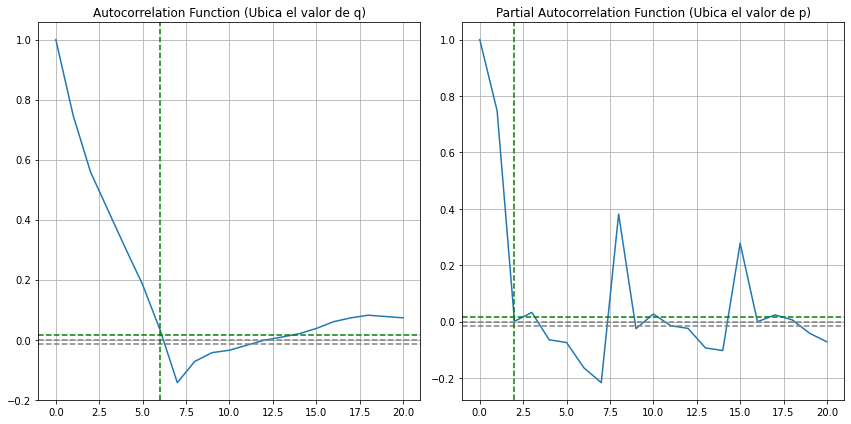

In [174]:
#Ahora haremos el modelo ARIMA, haciendo primero el AR, luego el MA y al final el conjunto, ARIMA:

#Comenzaremos por hacer las graficas que se usaran para localizar los valores de p y q (usando a d como 1):
#Ahora comenzaremos a aplicar el modelo ARIMA
lag_acf = acf(ts_test_logshft_diff, nlags=20)
lag_pacf = pacf(ts_test_logshft_diff, nlags=20, method = 'ols')

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_logshft_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_logshft_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias
plt.axvline(x=6, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')

# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_logshft_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_logshft_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()


$\text{Como podemos ver, el valor de q es alrededor de 6, mientras que el de p es alrededor de 2. Entonces q=6, p=2}$

$\text{PRIMER MODELO: AR}$

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                16428
Model:                 ARIMA(2, 1, 0)   Log Likelihood              123639.190
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 25 Feb 2021   AIC                        -247270.379
Time:                        06:43:16   BIC                        -247239.552
Sample:                    01-09-1975   HQIC                       -247260.197
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.621e-08   7.91e-07     -0.046      0.963   -1.59e-06    1.51e-06
ar.L1.D.value    -0.1455      0.008    -18.836      0.000      -0.161      -0.130
ar.L2.D.value    -0.1410      0.008    -

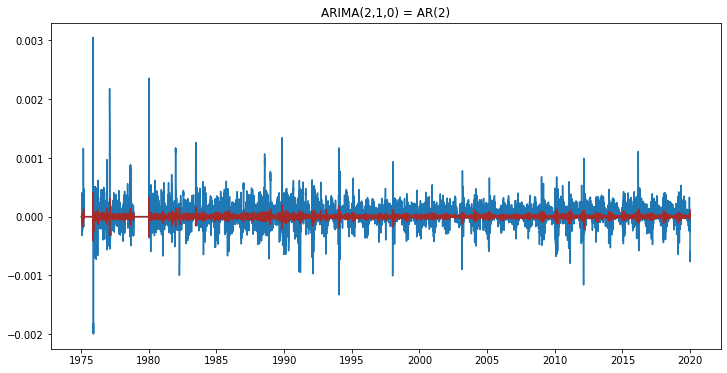

In [175]:
# Modelo AR(p): (p,d,q) = (2,1,0) 
model = ARIMA(ts_test_logshft_diff, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_test_logshft_diff)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())


$\text{MODELO 2: MA}$

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                16428
Model:                 ARIMA(0, 1, 6)   Log Likelihood              123420.287
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 25 Feb 2021   AIC                        -246824.574
Time:                        06:43:20   BIC                        -246762.920
Sample:                    01-09-1975   HQIC                       -246804.209
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.621e-08   7.99e-07     -0.045      0.964    -1.6e-06    1.53e-06
ma.L1.D.value    -0.1534        nan        nan        nan         nan         nan
ma.L2.D.value    -0.1473        nan     

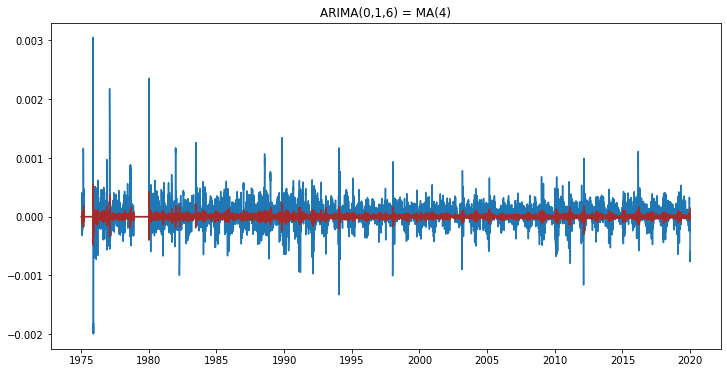

In [176]:
# Modelo MA(q): (p,d,q) = (0,1,6) 
model = ARIMA(ts_test_logshft_diff, order=(0,1,6), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(ts_test_logshft_diff)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,6) = MA(4)')
print(results_MA.summary())

$\text{MODELO 3: ARIMA}$

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                16428
Model:                 ARIMA(2, 1, 6)   Log Likelihood              123701.758
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 25 Feb 2021   AIC                        -247383.516
Time:                        06:43:34   BIC                        -247306.449
Sample:                    01-09-1975   HQIC                       -247358.060
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.348e-08   6.06e-07     -0.055      0.956   -1.22e-06    1.15e-06
ar.L1.D.value    -0.1442        nan        nan        nan         nan         nan
ar.L2.D.value    -0.1241        nan     

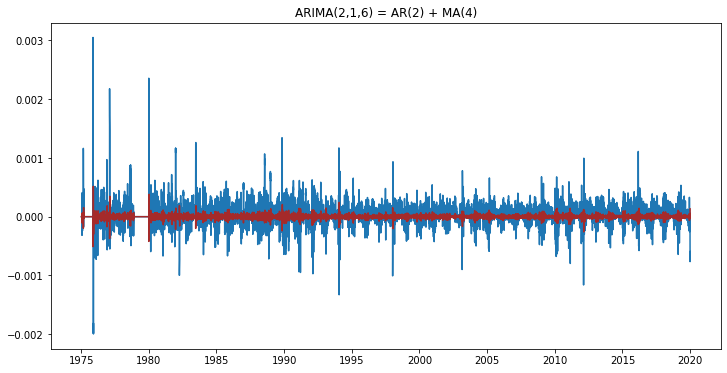

In [177]:
# Modelo ARIMA(p): (p,d,q) = (2,1,6) 
model = ARIMA(ts_test_logshft_diff, order=(2,1,6), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(ts_test_logshft_diff)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,6) = AR(2) + MA(4)')
print(results_ARIMA.summary())

$\text{Comparando los valores de los AIC:}$

In [178]:
#AR: -305436.146
#MA: -304987.862
#ARIMA: -305544.463 ---> Winner winner, chicken dinner

$\text{Devolviendo a la escala original el modelo ARIMA}$

Date
1975-01-09   -3.347625e-08
1975-01-10   -3.772799e-08
1975-01-11   -4.350679e-08
1975-01-12   -4.656588e-08
1975-01-13   -4.939827e-08
                  ...     
2019-12-27   -3.103523e-05
2019-12-28   -1.650583e-05
2019-12-29   -9.557742e-06
2019-12-30    5.760138e-05
2019-12-31    1.330485e-04
Length: 16428, dtype: float64
Date
1975-01-01   NaN
1975-01-02   NaN
1975-01-03   NaN
1975-01-04   NaN
1975-01-05   NaN
dtype: float64
Date
2019-12-27    2.611756
2019-12-28    2.611707
2019-12-29    2.611395
2019-12-30    2.611154
2019-12-31    2.611400
dtype: float64


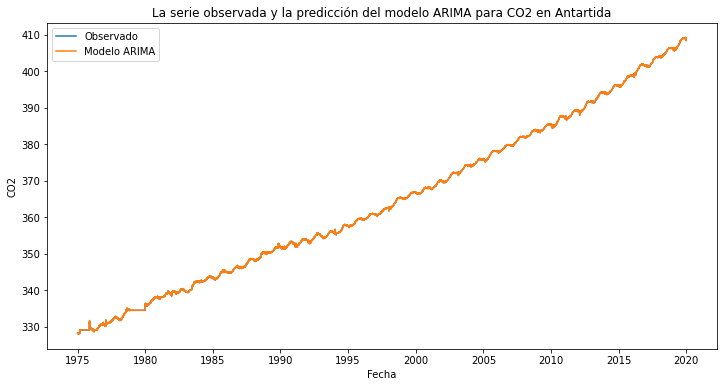

In [179]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)


# Le sumamos las predicciones de ARIMA a la serie observada (ts_testlog)
predictions_ARIMA_log = pd.Series(ts_testlog, index = ts_testlog.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff)
print(predictions_ARIMA_log.head())
print(predictions_ARIMA_log.tail())

# Regresamos a la escala de Temperatura original 
predictions_ARIMA = 10**(predictions_ARIMA_log)
# Graficamos la serie original y las predicciones con ARIMA

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(ts_test, label='Observado');
plt.plot(predictions_ARIMA, label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.title('La serie observada y la predicción del modelo ARIMA para CO2 en Antartida')
plt.legend(loc='best');

RMSE: 0.024689440093028883


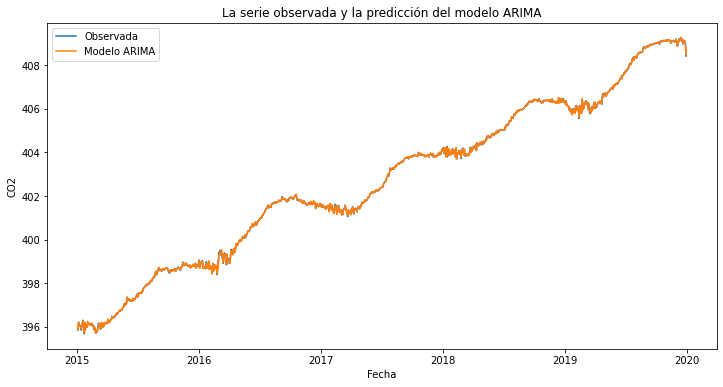

In [180]:
# Calculamos el RMSE (Root Mean Square Error - Error de la Raiz Cuadrada de la Media)

RMSE = np.sqrt(np.mean((predictions_ARIMA - ts_test)**2))
print('RMSE:', RMSE)

# Graficamos sólo los útimos datos de las series 
ts_test_inferiores = ts_test.tail(1825)
predictions_ARIMA_last = predictions_ARIMA.tail(1825)
plt.plot(ts_test_inferiores, label='Observada');
plt.plot(predictions_ARIMA_last, label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('CO2')
plt.title('La serie observada y la predicción del modelo ARIMA')
plt.legend(loc='best');


# $\underline{\text{FIN DE EXAMEN}}$